# Load libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
bcn_df = pd.read_csv('../data/raw/barcelona_listings_kagel.csv')

/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/2513329601.py:5: DtypeWarning:

Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.



# Load data and analize size and type of information in each column

In [91]:
bcn_df = pd.read_csv('../data/raw/barcelona_listings_kagel.csv')
#bcn_df.columns
#bcn_df.head
#print(bcn_df) # 19k rows  106 cols
print ('Understanding the data set')
print('The number of rows al columns in the original data set is: ',bcn_df.shape)
print('The list of columns in the original data set is: ',bcn_df.columns)
#bcn_df.columns
print('The list of columns and their value types are: ', bcn_df.info())
#bcn_df.head()

#ALL COLUMN NAMES ARE ALREADY LOWER CASE AND HAVE NO WHITE SPACES

# COLUMNS THAT CAN BE DIRECTLY REMOVED AS NO RELEVANT FOR THE ANALYSIS
# COLUMN SQUARE FEET HARS ONLY 500 NON NULL VALUES SO IT NEED TO BE REMOVED
#For example 'neighbourhood' and 'neighbourhood_cleansed' have the same information.No need for country.
df1 = bcn_df.copy()
columns_to_delete = ['neighborhood_overview','summary','country', 'host_has_profile_pic', 'square_feet','neighbourhood','street' ] 
df1.drop(columns=columns_to_delete, inplace=True)

df1.head()
df1.nunique()


/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/2224328569.py:1: DtypeWarning:

Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.



Understanding the data set
The number of rows al columns in the original data set is:  (19833, 62)
The list of columns in the original data set is:  Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'access', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'zipcode', 'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'square_feet', 'price', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_

id                              19833
listing_url                     19833
name                            19215
space                           12913
description                     18256
access                           7890
picture_url                     19499
host_id                          9743
host_url                         9743
host_name                        4120
host_since                       2803
host_response_time                  4
host_response_rate                 72
host_is_superhost                   2
host_picture_url                 9697
host_neighbourhood                152
host_listings_count                77
host_verifications                278
host_identity_verified              2
neighbourhood_cleansed             71
neighbourhood_group_cleansed       10
city                               38
zipcode                           121
latitude                         5566
longitude                        6871
is_location_exact                   2
property_typ

# Focus in the city of Barcelona: cleaning wrong values and filling nulls.

In [64]:

# CHECK FOR UNIQUE VALUES IN COLUMN "CITY" - REMOVE WHITE SPACES AND ALL LOWER CASE.
#print(bcn_df['city'].unique())
def city_lowercase(df):
    df['city'] = df['city'].str.lower().str.strip() 
    return df
df1 = city_lowercase(df1)
# Check if the replacement was successful
#print(df1['city'].unique())

#EXCLUDE AREAS OUTSIDE THE 10 BOROUGHS OF BARCELONA
values_to_delete = ['sant adria de besos', 'st cugat del vallès', 'барселона',"l'hospitalet de llobregat" ,'hospitalet de llobregat','03-jan', 'sant adrià de besòs','巴塞罗那' ,'sant cugat del vallès' , '巴塞罗纳','sant adrià de besos' ,'hospitalet','badalona']
# Filter DF to exclude rows with the specified values
df1 = df1[~df1['city'].isin(values_to_delete)]
#print(df1['city'].unique())

#REMAINING VALUES NEED TO BE ALL BARCELONA - REPLACE MISSPELLING
new_value = 'barcelona'
df1['city'] = df1['city'].replace(['barcelonaneta','барселона','sagrada familia, barcelona' ,'barcelone','bcn' ,'barcelona, catalunya, es', 'barcelona el raval' ,'zona forum','barcelon' ,'83-93' ,'08028, barcelona' ,'gracia-barcelona', '.','sants-les corts' ,'eixample', 'les corts' ,'*','maragall- hospital de sant pau' ,'sants'], new_value)
#print(df1['city'].unique())

# AFTERALL CLEANSED CHECK FOR NULL VALUES AND REPLACE FOR "barcelona"
null_count = df1['city'].isnull().sum()
df1['city'].fillna('barcelona', inplace=True)
# Check if the replacement was successful
null_cities = df1['city'].isnull().sum()
print(f"Number of null values in 'city' column after replacement: {null_cities}")
print(df1['city'].unique())

df2 = df1.copy()



Number of null values in 'city' column after replacement: 0
['barcelona']


/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/3754767292.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['city'].fillna('barcelona', inplace=True)


# Cleaning date tine format: 'host_since' and 'first_review'

# 'first_review' date formated, deal with nulls and replace them for 'host_since' date if valid.

In [65]:


# REFORMAT DATE FOR BOTH first_review AND host_since
df2['first_review'] = pd.to_datetime(df2['first_review'], errors='coerce')
df2['host_since'] = pd.to_datetime(df2['host_since'], errors='coerce')
# Check for null values in the 'date' column
print(df2['host_since'].unique())

# CHECK FOR NULLS IN 'first_review' : IF NULL GIVE THE VALUE OF THE COLUMN host_since
null_first_review = df2['first_review'].isnull().sum()
print(null_first_review )

def fill_first_review_with_host_since(row):
    if pd.isnull(row['first_review']) and pd.notnull(row['host_since']):
        return row['host_since']
    return row['first_review']

df2['first_review'] = df2.apply(fill_first_review_with_host_since, axis=1)
# Check if there are still null values in the 'first_review' column
null_count_after = df2['first_review'].isnull().sum()
print(f"Number of null values in 'first_review' after replacement: {null_count_after}")
#only 19 so drop thtem
df2.dropna(subset=['first_review'], inplace=True)
null_count_after2 = df2['first_review'].isnull().sum()
print(f"Number of null values in 'first_review' after replacement: {null_count_after2}")

# There are only 6 so delete those nulls.
null_count = df2['host_since'].isnull().sum()
print(f"Number of null values in 'host_since'' after replacement: {null_count}")

df3=df2.copy()

/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/3307108163.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['host_since'] = pd.to_datetime(df2['host_since'], errors='coerce')


<DatetimeArray>
['2010-01-19 00:00:00', '2010-02-18 00:00:00', '2010-04-14 00:00:00',
 '2010-05-29 00:00:00', '2010-06-02 00:00:00', '2010-06-09 00:00:00',
                 'NaT', '2010-01-24 00:00:00', '2010-06-25 00:00:00',
 '2010-07-05 00:00:00',
 ...
 '2019-07-04 00:00:00', '2017-12-28 00:00:00', '2013-11-20 00:00:00',
 '2019-07-05 00:00:00', '2019-07-06 00:00:00', '2019-07-07 00:00:00',
 '2019-07-08 00:00:00', '2015-03-27 00:00:00', '2014-12-26 00:00:00',
 '2019-07-09 00:00:00']
Length: 2803, dtype: datetime64[ns]
13342
Number of null values in 'first_review' after replacement: 19
Number of null values in 'first_review' after replacement: 0
Number of null values in 'host_since'' after replacement: 14


# 'host_since' date formated, deal with nulls and replace them for 'first_review' date.

In [66]:
df3 = df2.copy()

# APPLY DATE TIME FORMATTING
df3['host_since'] = pd.to_datetime(bcn_df['host_since'], errors='coerce')
# Check for null values in the 'date' column
null_dates = df3['host_since'].isnull().sum()
print(null_dates)
print(df1['host_since'].unique())

# CHECK FOR NULLS IN 'host_since' : IF NULL GIVE THE VALUE OF THE COLUMN 'first_review'
def fill_host_since_with_first(row):
    if pd.isnull(row['host_since']):
        return row['first_review']
    return row['host_since']

df3['host_since'] = df3.apply(fill_host_since_with_first, axis=1)
# Check if there are still null values in the 'first_review' column
null_host = df3['first_review'].isnull().sum()
print(f"Number of null values in 'first_review' after replacement: {null_host}")

df3['host_since_year'] = df3['host_since'].dt.year
print(df3[['host_since', 'host_since_year']].head())
df4 = df3.copy()

/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/1835777642.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df3['host_since'] = pd.to_datetime(bcn_df['host_since'], errors='coerce')


14
['19/01/2010' '18/02/2010' '14/04/2010' ... '27/03/2015' '26/12/2014'
 '09/07/2019']
Number of null values in 'first_review' after replacement: 0
  host_since  host_since_year
0 2010-01-19             2010
1 2010-01-19             2010
2 2010-02-18             2010
4 2010-04-14             2010
5 2010-05-29             2010


# Price and cleaning_price : convert to floats and clean format.

In [67]:
#price and cleaning fee need to be numbers, and null for price deleted

#print(bcn_df['cleaning_fee'].unique())
# REMOVE THE $ SIGN AND OTHER SIMBOLS FOR BOTH PRICE AND CLEANING_FEE:
def convert_to_float(value):
    if isinstance(value, int) or isinstance(value, float):
        return float(value)
    elif isinstance(value, str):
        value = value.replace('$', '').replace(',', '')
        return float(value)
    return value  # In case the value is already NaN or some other type

df4['price'] = df4['price'].apply(convert_to_float)
df4['cleaning_fee'] = df4['cleaning_fee'].apply(convert_to_float).round(2)
print(df4[['price', 'cleaning_fee']].head())
#print(df4['price'].unique())

# CHECK FOR NULLS 
null_price_count = df4['price'].isnull().sum()
print(f"Number of null values in 'price': {null_price_count}")
null_clean_count = df4['cleaning_fee'].isnull().sum()
print(f"Number of null values in 'price': {null_clean_count}")

#FOR CLEANING_FEE FILL THE NULS. WITH THE AVRG. PER NEIGHBOURHOOD.
neighbourhood_avg_cleaning_fee = df4.groupby('neighbourhood_cleansed')['cleaning_fee'].transform('mean')
df4['cleaning_fee'].fillna(neighbourhood_avg_cleaning_fee, inplace=True)
# Verify that there are no null values left for 'cleaning_fee' column
final_clean_count = df4['cleaning_fee'].isnull().sum()
print(f"Number of null values in 'cleaning_fee' after filling: {final_clean_count}")

# FOR REMAINING NULL REPLACE THEM WITH THE AVRG. CLEANING_FEE PER GROUPED NEIGHBOURHOOD.
neighbourhood_grouped_avg_cleaning_fee = df4.groupby('neighbourhood_group_cleansed')['cleaning_fee'].transform('mean')
df4['cleaning_fee'].fillna(neighbourhood_grouped_avg_cleaning_fee, inplace=True)

# Verify that there are no null values left for 'cleaning_fee' column
fin = df4['cleaning_fee'].isnull().sum()
print(f"Number of null values in 'cleaning_fee' after filling: {fin}")

df5=df4.copy()

   price  cleaning_fee
0  130.0          42.0
1   60.0          50.0
2   33.0           NaN
4   45.0           NaN
5   42.0           NaN
Number of null values in 'price': 0
Number of null values in 'price': 4038
Number of null values in 'cleaning_fee' after filling: 2
Number of null values in 'cleaning_fee' after filling: 0


/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/2174795274.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['cleaning_fee'].fillna(neighbourhood_avg_cleaning_fee, inplace=True)
/var/folders/yl/d5x0r6t10l52bms12sy70rzc0000gn/T/ipykernel_38307/2174795274.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

# Check for nul values and duplicates for : 'neighbourhood_cleansed' and 'neighbourhood_grouped_cleansed'

In [68]:
null = df5['neighbourhood_group_cleansed'].isnull().sum()
print(f"Number of null values in 'neigh group': {null}")

null = df5['neighbourhood_cleansed'].isnull().sum()
print(f"Number of null values in 'neigh': {null}")
print(bcn_df['neighbourhood_group_cleansed'].nunique())
print(bcn_df['neighbourhood_cleansed'].nunique())

Number of null values in 'neigh group': 0
Number of null values in 'neigh': 0
10
71


# Zip_code : clean format and fill nul values 

In [69]:
#zipcode should be numerical ( fill up nuls with nighbourhood code
#print(bcn_df['zipcode'].unique())
# Clean the 'zipcode' column
df5['zipcode'] = df5['zipcode'].astype(str)
df5['zipcode'] = df5['zipcode'].str.extract('(\d+)', expand=False)
zipcode_dict = {
    '0': '8000',
    '2015': '8015',
    '13': '8013',
    '28013': '8013',
    '2024': '8024',
    '80001': '8001',
    '80020': '8002',
    '92134': '',
    '9': '8009',
    '806': '8006',
    '2335': '8035',
    '4008009': '8009'
}

# Function to clean and update zipcodes based on the dictionary
def clean_zipcode(zipcode):
    if pd.isnull(zipcode):  # If the value is NaN, return NaN
        return np.nan
    str_zipcode = str(int(zipcode))  # Convert to string without decimal part
    return zipcode_dict.get(str_zipcode, str_zipcode)  # Return the mapped value or the original if not in dictionary

# Apply the clean_zipcode function
df5['zipcode'] = df5['zipcode'].apply(clean_zipcode)
df5['zipcode'] = pd.to_numeric(df5['zipcode'], errors='coerce')
df5['zipcode'] = df5['zipcode'].astype('Int64')
null_zipcode_count = df5['zipcode'].isnull().sum()

# Create a mapping of neighbourhood_cleansed to get zipcode
zipcode_mapping = df5.groupby('neighbourhood_cleansed')['zipcode'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

# Function to fill missing zipcodes based on the neighbourhood
def fill_missing_zipcode(row, mapping):
    if pd.isnull(row['zipcode']):
        return mapping.get(row['neighbourhood_cleansed'], np.nan)
    return row['zipcode']

df5['zipcode'] = df5.apply(fill_missing_zipcode, axis=1, mapping=zipcode_mapping)

# Check for null values in 'zipcode' after filling
null_zipcode_count_after = df5['zipcode'].isnull().sum()
print(f"Number of null values in 'zipcode' after filling nulls: {null_zipcode_count_after}")

df7=df5.copy()

Number of null values in 'zipcode' after filling nulls: 0


# Clean the amenities column

In [97]:

# Split the amenities column into lists
df7['amenities'] = df7['amenities'].str.split(',')

# Add a new column with the count of amenities
df7['amenities_count'] = df7['amenities'].apply(len)

# Print the updated DataFrame
print("Updated DataFrame with amenities count:")
print(df7)

Updated DataFrame with amenities count:
             id                            listing_url  \
0         18666     https://www.airbnb.com/rooms/18666   
1         18674     https://www.airbnb.com/rooms/18674   
2         21605     https://www.airbnb.com/rooms/21605   
4         25786     https://www.airbnb.com/rooms/25786   
5         31377     https://www.airbnb.com/rooms/31377   
...         ...                                    ...   
19828  36575390  https://www.airbnb.com/rooms/36575390   
19829  36579000  https://www.airbnb.com/rooms/36579000   
19830  36580710  https://www.airbnb.com/rooms/36580710   
19831  36580899  https://www.airbnb.com/rooms/36580899   
19832  36582760  https://www.airbnb.com/rooms/36582760   

                                                    name  \
0                                Flat with Sunny Terrace   
1        Huge flat for 8 people close to Sagrada Familia   
2                              Nice and sunny duble room   
4             NICE ROOM

# Missing values for bedrooms, beds, and bathrooms are replaced with the median.

In [ ]:
df7.bed_type.value_counts()
df7.drop('bed_type', axis=1, inplace=True)
for col in ['bathrooms', 'bedrooms', 'beds']:
    df7[col].fillna(df7[col].median(), inplace=True)

# Load data

# Create new column: tourist_atractions

In [112]:
# DEFINE A DICTONARY WITH ALL THE MAIN TOURIS ATTRACTIONS BY NEIGHBOURHOOD, CREATE A NEW COLUMN TO BE ADDED ON THE DF, AND ANOTHER FOR THE TOTAL.
tourist_attractions = {
    'Sant Martí': ['Playa Poblenou', 'Museo de Ciencias Naturales','Torre Glòries', 'Museo del Diseño'],
    'Eixample': ['Casa Batlló', 'Casa Milà', 'Passeig de Gràcia', 'Mercado de Sant Antoni', 'Mercado de los Encants','El Auditorio','Teatro Nacional de Cataluña','Sagrada Familia', 'Las Arenas', 'La plaza de Catalunya','La Casa de les Punxes'],
    'Gràcia': ['Park Güell', 'Vila de Gràcia', 'El paseo de Sant Joan', 'La Casa Vicens','La Casa Fuster'],
    'Horta-Guinardó': ['Parc del Laberint dHorta','Hospital de Sant Pau','Collserola'],
    'Les Corts': ['Camp Nou', 'Jardines de Pedralbes', 'Los Pabellones de la Finca Güell', 'El Real Monasterio de Santa Maria de Pedralbes'],
    'Ciutat Vella': ['La Rambla', 'Barrio Gótico', 'Museo Picasso', 'Catedral de Barcelona', 'Mercado Sant Pere y Santa Caterina', 'Palau de la Musica','Santa Maria del Mar','El Born y la Ribera','La Barceloneta', 'El Arco de Triunfo', 'Drassanes', 'El Mercado de la Boqueria', 'La plaza del Rei', 'La plaza Reial', 'El Palau de Mar','El Gran Teatre del Liceu', 'El Palau Güell', 'El parque de la Ciutadella', 'La playa de la Barceloneta', 'El Zoo de Barcelona'],
    'Sants-Montjuïc': ['Montjuïc', 'Fuente Magica', 'Poble Espanyol', 'El Museo Nacional de Arte de Catalunya', 'Sants y Hostafrancs', 'La plaza de Espanya', 'El Jardín Botánico - Museu de Ciències Naturals de Barcelona', 'CaixaForum', 'El Pabellón Mies van der Rohe - Institut Municipal Fundació Mies van der Rohe', 'El teleférico de Montjuïc', 'El Teatre Grec', 'El Palacio de Sant Jordi', 'El Estadio Olímpico'],
    'Sarrià-Sant Gervasi': ['CosmoCaixa', 'Parque Tibidabo'],
    'Nou Barris': ['El parque Central de Nou Barris'],
    'Sant Andreu': ['Fabra i Coats']
}

def get_tourist_attractions(neighbourhood):
    return tourist_attractions.get(neighbourhood, [])

df7['tourist_attractions'] = df7['neighbourhood_group_cleansed'].apply(lambda x: get_tourist_attractions(x))
df7['total_tourist_attractions'] = df7['tourist_attractions'].apply(len)

#print(df7.head())

df8= df7.copy()

# Analysis of listings: year of creationg, listings per neighbourhood, top owners

# Analysis : price per neighbourhood grouped

In [105]:
# Calculate descriptive statistics for 'price' by 'neighbourhood'
stats = df8.groupby('neighbourhood_group_cleansed')['price'].describe().round()
# Pivot table with descriptive statistics
pivot_price_neighbourhood = df8.pivot_table(values='price', index='neighbourhood_group_cleansed', aggfunc=['mean','min', 'max'])

# Rename the columns to match the output of describe()
pivot_price_neighbourhood.columns = [ 'mean', 'min', 'max']

# Round the values to the nearest integer
pivot_price_neighbourhood = pivot_price_neighbourhood.round()

# Print the pivot table
print("\nPivot table with descriptive statistics:")
print(pivot_price_neighbourhood)


Pivot table with descriptive statistics (no decimals):
                               mean   min     max
neighbourhood_group_cleansed                     
Ciutat Vella                   85.0   8.0  5000.0
Eixample                      181.0   9.0  6000.0
Gràcia                        148.0   7.0  8000.0
Horta-Guinardó                 78.0   9.0  3000.0
Les Corts                      93.0   9.0  3000.0
Nou Barris                     55.0   9.0  2500.0
Sant Andreu                    64.0  12.0  2000.0
Sant Martí                    129.0   8.0  5000.0
Sants-Montjuïc                100.0   9.0  9120.0
Sarrià-Sant Gervasi           120.0   9.0  2340.0


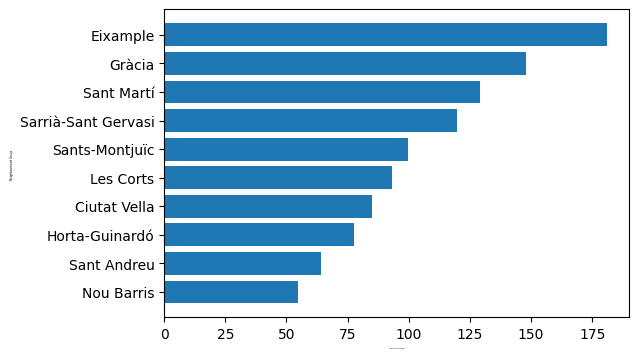

In [159]:
# NEIGHBOURHOODS WITH HIGHEWR AVERAGE PRICE

# Calculate the average price per neighbourhood_group_cleansed
avg_price = df8.groupby('neighbourhood_group_cleansed')['price'].mean().head(10).sort_values()

# Get the neighbourhood groups and their average prices
x = avg_price.index.to_list()
y = avg_price.values

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('Average Price x night', fontsize=1)
ax.set_ylabel('Neighbourhood Group ',fontsize=2)

# Plot horizontal bars with grey color
ax.barh(x, y)
ax.tick_params(axis='both', which='major', labelsize=10)
# Display the plot
plt.show()
#avg_price = df8.groupby('neighbourhood_group_cleansed')['price'].mean().head(10).sort_values()

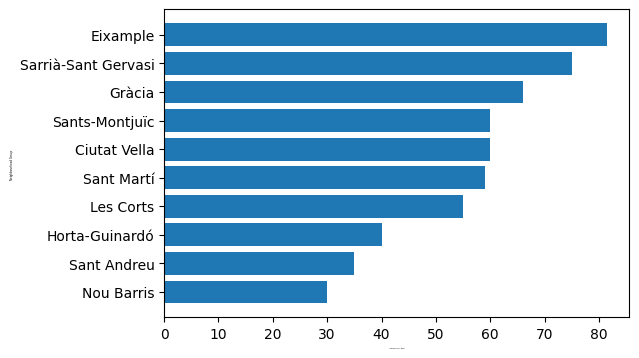

In [158]:
# NEIGHBOURHOODS WITH HIGHEWR AVERAGE PRICE

# Calculate the average price per neighbourhood_group_cleansed
avg_price = df8.groupby('neighbourhood_group_cleansed')['price'].median().head(10).sort_values()

# Get the neighbourhood groups and their average prices
x = avg_price.index.to_list()
y = avg_price.values
#plt.figure(figsize=(4, 2))
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('Average Price x night', fontsize=1)
ax.set_ylabel('Neighbourhood Group ', fontsize=2)

# Plot horizontal bars with grey color
ax.barh(x, y)
ax.tick_params(axis='both', which='major', labelsize=10)
# Display the plot
plt.show()
#avg_price = df8.groupby('neighbourhood_group_cleansed')['price'].mean().head(10).sort_values()

In [147]:
# Calculate descriptive statistics for 'listings' by numero de guests

stats = df8.groupby('accommodates')['price'].describe().round()
# Pivot table with descriptive statistics
pivot_price_accommodates = df8.pivot_table(values='price', index='accommodates', aggfunc=['mean', 'min', 'max'])

# Rename the columns to match the output of describe()
pivot_price_accommodates.columns = ['mean','min', 'max']

# Round the values to the nearest integer
pivot_price_accommodates = pivot_price_accommodates.round()

# Print the pivot table
print("\nPivot table with descriptive statistics (no decimals):")
print(pivot_price_accommodates)


Pivot table with descriptive statistics (no decimals):
               mean    min     max
accommodates                      
1              71.0    7.0  6000.0
2              86.0    8.0  9120.0
3              90.0    9.0  2000.0
4             158.0    8.0  8000.0
5             139.0    9.0  5000.0
6             229.0    9.0  5000.0
7             213.0   15.0  5000.0
8             293.0   20.0  8000.0
9             306.0   20.0  5000.0
10            335.0   15.0  5000.0
11            258.0   40.0   655.0
12            693.0   20.0  8000.0
13            284.0  161.0   399.0
14            487.0   20.0  2173.0
15            239.0   22.0   400.0
16            420.0    9.0  1290.0
18            567.0  567.0   567.0


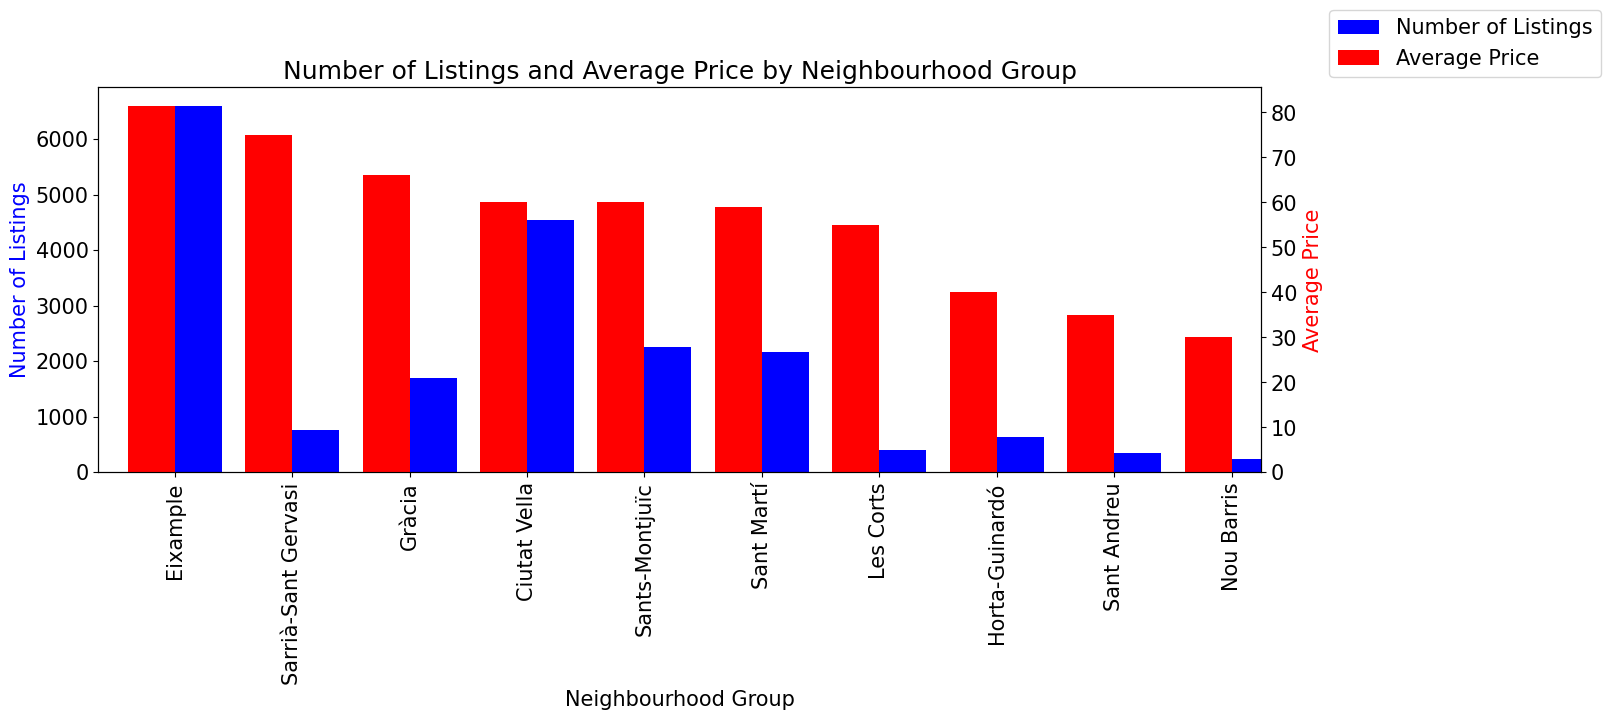

In [142]:

# Create a DataFrame of listing counts and median price by neighbourhood_group_cleansed
neighbourhood_df = df8.groupby('neighbourhood_group_cleansed').agg(
    number_of_listings=('id', 'size'),
    average_price=('price', 'median')
).reset_index()

# Set the neighbourhood_group_cleansed column as the index
neighbourhood_df.set_index('neighbourhood_group_cleansed', inplace=True)

# Sort the DataFrame by average_price
neighbourhood_df_sorted = neighbourhood_df.sort_values('average_price', ascending=False)

# Plot number of listings and median price in one bar plot
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = 15,5

fig, ax1 = plt.subplots()

# Plot number of listings as bar plot
neighbourhood_df_sorted['number_of_listings'].plot(kind='bar', ax=ax1, position=0, width=0.4, color='b', label='Number of Listings')

# Create a second y-axis for the average price
ax2 = ax1.twinx()
neighbourhood_df_sorted['average_price'].plot(kind='bar', ax=ax2, position=1, width=0.4, color='r', label='Average Price')

# Set the labels and title
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Number of Listings', color='b')
ax2.set_ylabel('Average Price', color='r')
ax1.set_xticklabels(neighbourhood_df_sorted.index, rotation=90)
plt.title('Number of Listings and Average Price by Neighbourhood Group')

# Add legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower left', bbox_to_anchor=(1.05, 1))

plt.show()


In [133]:

# Creating a dataframe of listing counts and median price by borough
neighbourhood_df = df8.groupby('neighbourhood_group_cleansed').size()
neighbourhood_df.rename(columns={0: 'number_of_listings'}, inplace=True)
neighbourhood_df['average_price'] = df.groupby('neighbourhood_group_cleansed').price.median().values

# Plot number of listings and median price in one bar plot
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = 25, 5
neighbourhood_df_sorted = neighbourhood_df.sort_values('average_price', ascending=False)
neighbourhood_df_sorted.plot( kind= 'bar' , secondary_y= 'average_price' , rot= 90 )
plt.xticks(rotation='vertical')

plt.show()

TypeError: Series.rename() got an unexpected keyword argument 'columns'

# Analysys regarding the type of apartment

In [110]:
# Calculate descriptive statistics for 'listings' by room type
stats = df8.groupby('room_type')['price'].describe().round()
# Pivot table with descriptive statistics
pivot_price_accommodates = df8.pivot_table(values='price', index='room_type', aggfunc=['mean', 'min', 'max'])

# Rename the columns to match the output of describe()
pivot_price_accommodates.columns = ['mean','min', 'max']

# Round the values to the nearest integer
pivot_price_accommodates = pivot_price_accommodates.round()

# Print the pivot table
print("\nPivot table with descriptive statistics (no decimals):")
print(pivot_price_accommodates)


Pivot table with descriptive statistics (no decimals):
                  mean  min     max
room_type                          
Entire home/apt  179.0  8.0  8000.0
Private room      80.0  7.0  9120.0
Shared room      326.0  8.0  8000.0


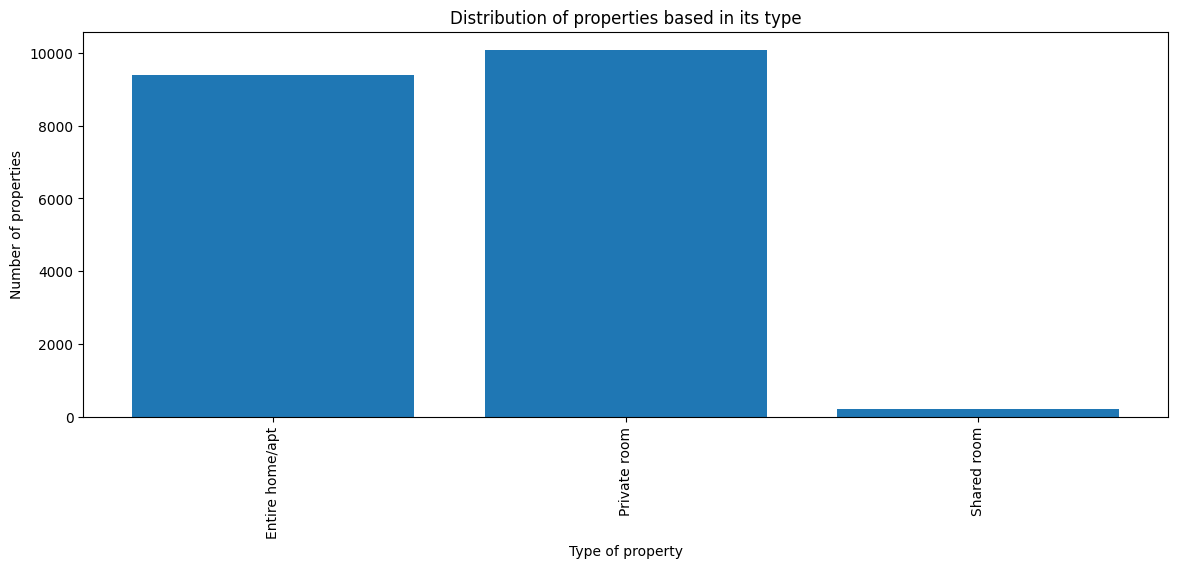

In [111]:
#what type of properties
props_by_type = df8.dropna(subset=["room_type"]).groupby("room_type")["id"].agg(["count"])
plt.figure(figsize=(14,5))
x = props_by_type.index
y = props_by_type["count"]
plt.bar(x, y)
plt.xticks(x, x, rotation="vertical")
plt.ylabel("Number of properties")
plt.xlabel("Type of property")
plt.title("Distribution of properties based in its type")
plt.show()

# How are different numeric attributes of property correlated to its booking price?

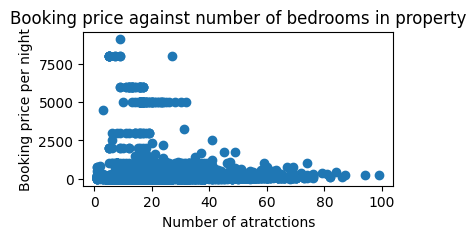

In [122]:
atractions = df8.dropna(subset=["amenities_count", "price"])

x = atractions["amenities_count"]
y = atractions["price"]

plt.figure(figsize=(4, 2))  # Adjust the figsize as needed
plt.scatter(x, y)

plt.xlabel("Number of amenities in the aprtment")
plt.ylabel("Booking price per night")
plt.title("Booking price against number of bedrooms in property")

plt.show()

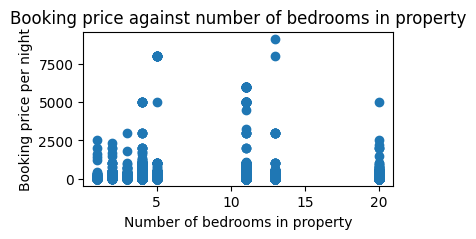

In [120]:


atractions = df8.dropna(subset=["total_tourist_attractions", "price"])

x = atractions["total_tourist_attractions"]
y = atractions["price"]

plt.figure(figsize=(4, 2))  # Adjust the figsize as needed
plt.scatter(x, y)

plt.xlabel("Number of bedrooms in property")
plt.ylabel("Booking price per night")
plt.title("Booking price against number of bedrooms in property")

plt.show()

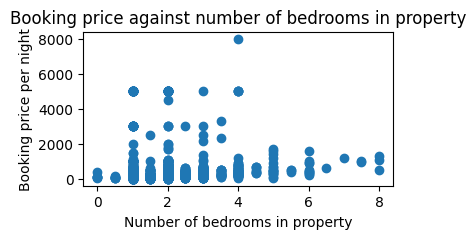

In [119]:
# NUMBER OF BEDROOMS IN PROPERTY

bathroom_df = df8[df8['room_type'] == 'Entire home/apt']

bed = bathroom_df.dropna(subset=["bathrooms", "price"])

# Extract the 'bedrooms' and 'price' columns
x = bed["bathrooms"]
y = bed["price"]

# Create a smaller scatter plot
plt.figure(figsize=(4, 2))  # Adjust the figsize as needed
plt.scatter(x, y)

# Set labels and title
plt.xlabel("Number of bedrooms in property")
plt.ylabel("Booking price per night")
plt.title("Booking price against number of bedrooms in property")

# Show the plot
plt.show()

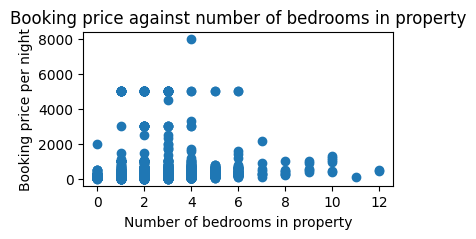

In [117]:

room_df = df8[df8['room_type'] == 'Entire home/apt']

# Drop rows with missing values in 'bedrooms' and 'price'
bed = room_df.dropna(subset=['bedrooms', 'price'])

# Extract the relevant columns
x = bed['bedrooms']
y = bed['price']

# Plotting
plt.figure(figsize=(4, 2))  # Adjust the figsize as needed
plt.scatter(x, y)

plt.xlabel("Number of bedrooms in property")
plt.ylabel("Booking price per night")
plt.title("Booking price against number of bedrooms in property")

plt.show()

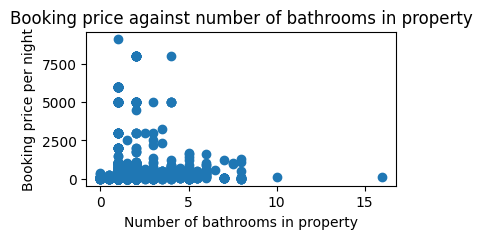

In [126]:
bed = df8.dropna(subset=["bathrooms", "price"])

# Extract the 'bedrooms' and 'price' columns
x = bed["bathrooms"]
y = bed["price"]

# Create a smaller scatter plot
plt.figure(figsize=(4, 2))  # Adjust the figsize as needed
plt.scatter(x, y)

# Set labels and title
plt.xlabel("Number of bathrooms in property")
plt.ylabel("Booking price per night")
plt.title("Booking price against number of bathrooms in property")

# Show the plot
plt.show()

# reviews

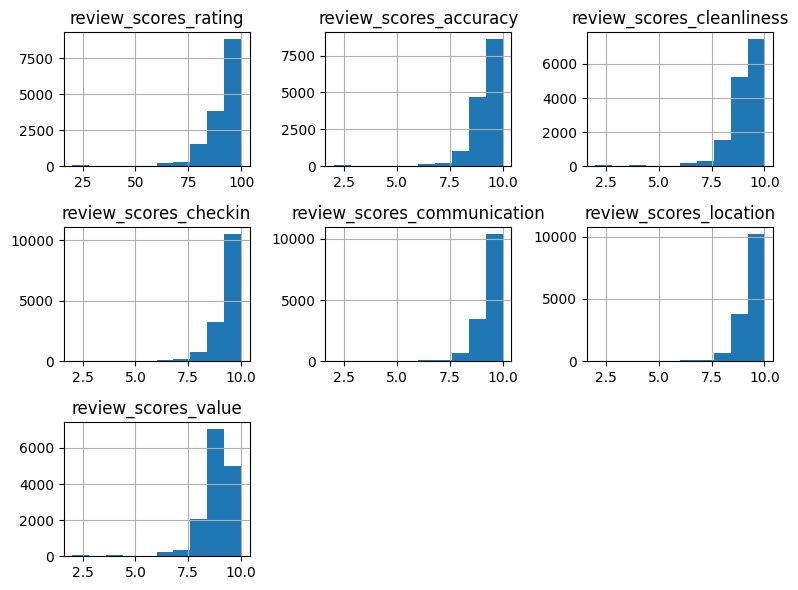

In [130]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df8.columns[df8.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(8,6))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df8[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [96]:
# do code to calculate the  following statistics for some numerical columns:
columns_to_calculate = ['price']
# Calculate overall statistics
overall_stats = df8[columns_to_calculate].describe()

# Calculate statistics by 'neighbourhood_cleansed'
stats_by_neighbourhood_cleansed = df8.groupby('neighbourhood_cleansed')[columns_to_calculate].describe()

# Calculate statistics by 'neighbourhood_group_cleansed'
stats_by_neighbourhood_group_cleansed = df8.groupby('neighbourhood_group_cleansed')[columns_to_calculate].describe()

# Display overall statistics
print("Overall Statistics:")
print(overall_stats)

# Display statistics by 'neighbourhood_cleansed'
print("\nStatistics by 'neighbourhood_cleansed':")
print(stats_by_neighbourhood_cleansed)

# Display statistics by 'neighbourhood_group_cleansed'
print("\nStatistics by 'neighbourhood_group_cleansed':")
print(stats_by_neighbourhood_group_cleansed)


# Calculate statistics for 'price_per_night'
price_per_night_stats = df8['price_per_night'].describe()

# Calculate statistics for 'price_per_night' by 'neighbourhood_cleansed'
price_per_night_by_neighbourhood_cleansed = df8.groupby('neighbourhood_cleansed')['price_per_night'].describe()

# Calculate statistics for 'price_per_night' by 'neighbourhood_group_cleansed'
price_per_night_by_neighbourhood_group_cleansed = df8.groupby('neighbourhood_group_cleansed')['price_per_night'].describe()


Overall Statistics:
              price
count  19694.000000
mean     129.765258
std      424.917874
min        7.000000
25%       40.000000
50%       65.000000
75%      112.750000
max     9120.000000

Statistics by 'neighbourhood_cleansed':
                                price                                      \
                                count        mean         std   min   25%   
neighbourhood_cleansed                                                      
Baró de Viver                     1.0   25.000000         NaN  25.0  25.0   
Can Baró                         44.0   73.522727   55.950347  22.0  30.0   
Can Peguera                       1.0   15.000000         NaN  15.0  15.0   
Canyelles                         3.0   46.333333   32.715949  25.0  27.5   
Ciutat Meridiana                 10.0   31.300000   24.702901  16.0  19.0   
...                               ...         ...         ...   ...   ...   
la Vila Olímpica del Poblenou   187.0  208.032086  303.447661  20.

In [123]:
import pandas as pd
import seaborn as sb
import plotly.express as px

# Datos con latitud/longitud y valores. Los nombres de columna son latitude, longitude y tot_pob


fig = px.density_mapbox(df8, lat = 'latitude', lon = 'longitude', z = 'id',
                        radius = 2,
                        center = dict(lat = 42.83, lon = -8.35),
                        zoom = 6,
                        mapbox_style = 'open-street-map')
fig.show()

In [73]:
import plotly.express as px
import plotly.io as pio
#import kaleidoimport plotly.express as px

# Load your dataset
# Replace 'path_to_your_dataset.csv' with the actual path to your dataset


# Ensure the dataset has the required columns
# The dataset should have columns like 'latitude', 'longitude', 'name', 'price', etc.

# Create a Plotly scatter mapbox
fig = px.scatter_mapbox(df8, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="id",  # The column you want to show on hover (e.g., listing name)
                        hover_data={"price": True, "neighbourhood_group_cleansed": True},  # Additional data to show on hover
                        color_discrete_sequence=["fuchsia"], 
                        zoom=6, 
                        height=300)

# Update the layout of the map
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the map
fig.show()

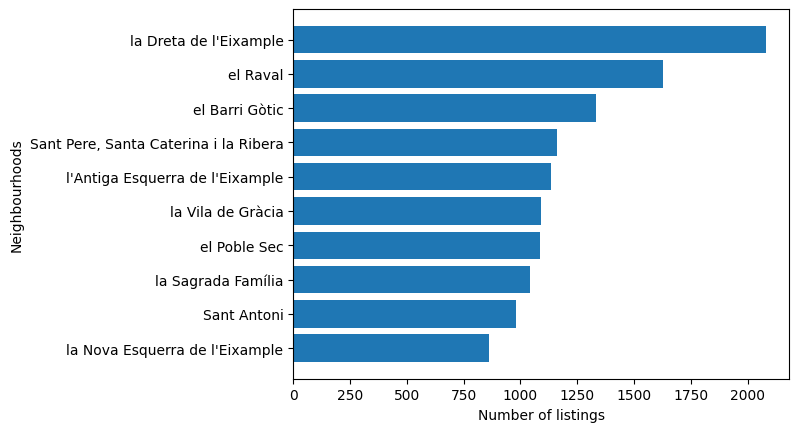

In [75]:
# NEIGHBOURHOODS  WITH MORE LISTINGS
# Get the value counts for 'neighbourhood_group_cleansed'
# Get the value counts for 'neighbourhood_group_cleansed'

value_count = df8['neighbourhood_cleansed'].value_counts().head(10).sort_values(ascending=True)
x = value_count.index.to_list()
y = value_count.values

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Number of listings')
ax.set_ylabel('Neighbourhoods')

# Plot horizontal bars
ax.barh(x, y)

# Display the plot
plt.show()

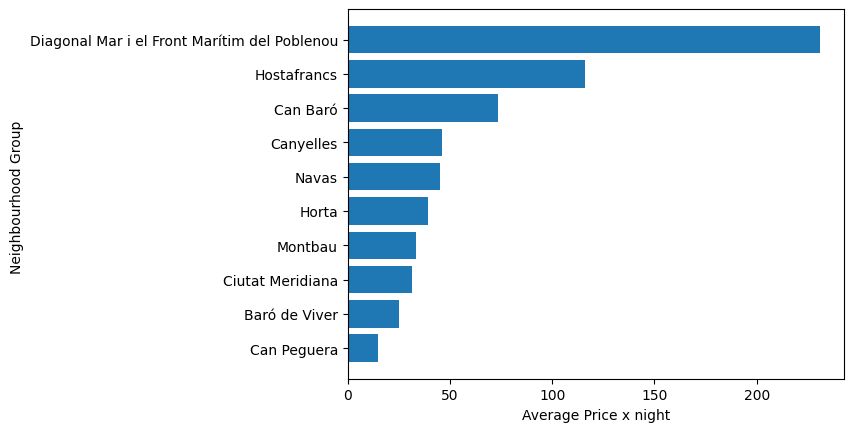

In [76]:
# NEIGHBOURHOODS WITH HIGHEWR AVERAGE PRICE

# Calculate the average price per neighbourhood_group_cleansed
avg_price = df8.groupby('neighbourhood_cleansed')['price'].mean().head(10).sort_values()

# Get the neighbourhood groups and their average prices
x = avg_price.index.to_list()
y = avg_price.values

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Average Price x night')
ax.set_ylabel('Neighbourhood Group ')

# Plot horizontal bars with grey color
ax.barh(x, y)

# Display the plot
plt.show()

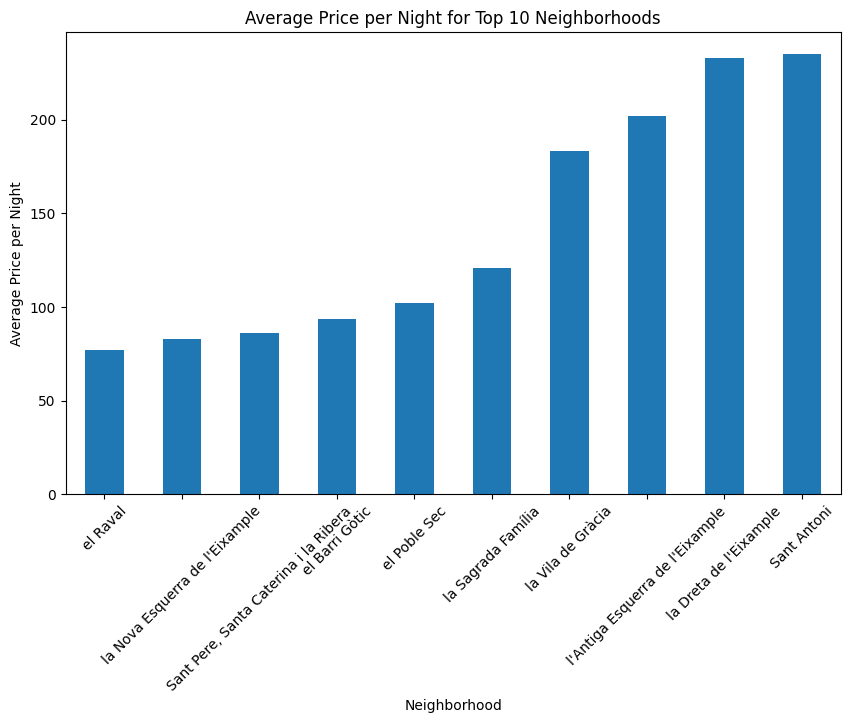

In [77]:

# NEIGHBOURHOODS WITH HIGHER SCORE REVIEWS

# Get the top 10 neighborhoods with the highest number of listings
top_10_neighborhoods = df8['neighbourhood_cleansed'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top 10 neighborhoods
df_top_10 = df8[df8['neighbourhood_cleansed'].isin(top_10_neighborhoods)]

# Calculate the average price per night for each neighborhood
average_price_per_night = df_top_10.groupby('neighbourhood_cleansed')['price'].mean().sort_values()

# Plot the average price per night for each neighborhood
average_price_per_night.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Neighborhood')
plt.ylabel('Average Price per Night')
plt.title('Average Price per Night for Top 10 Neighborhoods')
plt.xticks(rotation=45)
plt.show()


In [78]:
df8['host_id'].nunique()

9669

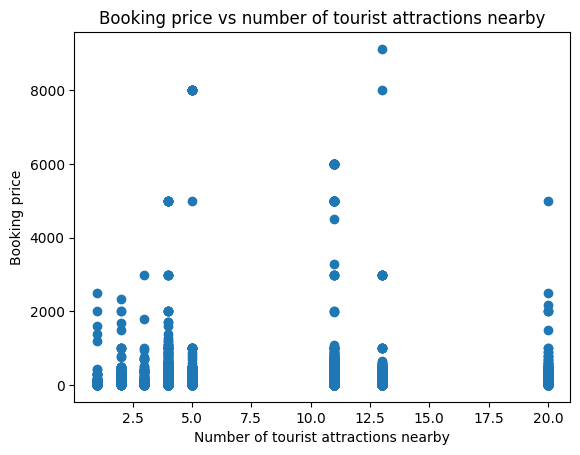

In [80]:
#how does the price vary regarding the number of a tourist place to visit

sil = df8.dropna(subset=['total_tourist_attractions', 'price'])

# Convert 'total_tourist_attractions' to integer
sil['total_tourist_attractions'] = sil['total_tourist_attractions'].astype(int)

# Extract the 'total_tourist_attractions' and 'price' columns
x = sil['total_tourist_attractions']
y = sil['price']

# Create the scatter plot
plt.scatter(x, y)

# Set labels and title
plt.xlabel("Number of tourist attractions nearby")
plt.ylabel("Booking price")
plt.title("Booking price vs number of tourist attractions nearby")

# Show the plot
plt.show()

# 9. How are different numeric attributes of property correlated to its booking price?

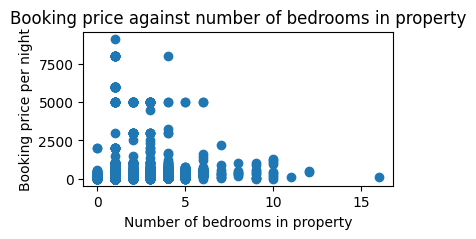

In [81]:
bed = df8.dropna(subset=["bedrooms", "price"])

# Extract the 'bedrooms' and 'price' columns
x = bed["bedrooms"]
y = bed["price"]

# Create a smaller scatter plot
plt.figure(figsize=(4, 2))  # Adjust the figsize as needed
plt.scatter(x, y)

# Set labels and title
plt.xlabel("Number of bedrooms in property")
plt.ylabel("Booking price per night")
plt.title("Booking price against number of bedrooms in property")

# Show the plot
plt.show()

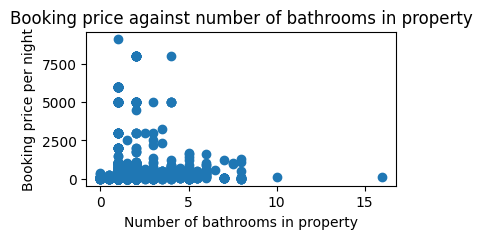

In [82]:
bed = df8.dropna(subset=["bathrooms", "price"])

# Extract the 'bedrooms' and 'price' columns
x = bed["bathrooms"]
y = bed["price"]

# Create a smaller scatter plot
plt.figure(figsize=(4, 2))  # Adjust the figsize as needed
plt.scatter(x, y)

# Set labels and title
plt.xlabel("Number of bathrooms in property")
plt.ylabel("Booking price per night")
plt.title("Booking price against number of bathrooms in property")

# Show the plot
plt.show()

In [124]:
# Group by 'neighbourhood' and calculate the mean of the specified columns
grouped = df8.groupby('neighbourhood_group_cleansed').mean()

# Extract data for plotting
neighbourhoods = grouped.index.values
cleaning_scores = grouped['review_scores_cleanliness'].values
location_scores = grouped['review_scores_location'].values
value_scores = grouped['review_scores_value'].values
total_scores = grouped['total score'].values

# Plotting
X_axis = np.arange(len(neighbourhoods))

plt.figure(figsize=(10, 6))
plt.bar(X_axis - 0.3, cleaning_scores, 0.2, label='Cleaning Score')
plt.bar(X_axis - 0.1, location_scores, 0.2, label='Location Score')
plt.bar(X_axis + 0.1, value_scores, 0.2, label='Value Score')
plt.bar(X_axis + 0.3, total_scores, 0.2, label='Total Score')

plt.xticks(X_axis, neighbourhoods, rotation=45)
plt.xlabel("Neighbourhood")
plt.ylabel("Average Scores")
plt.title("Average Scores by Neighbourhood")
plt.legend()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

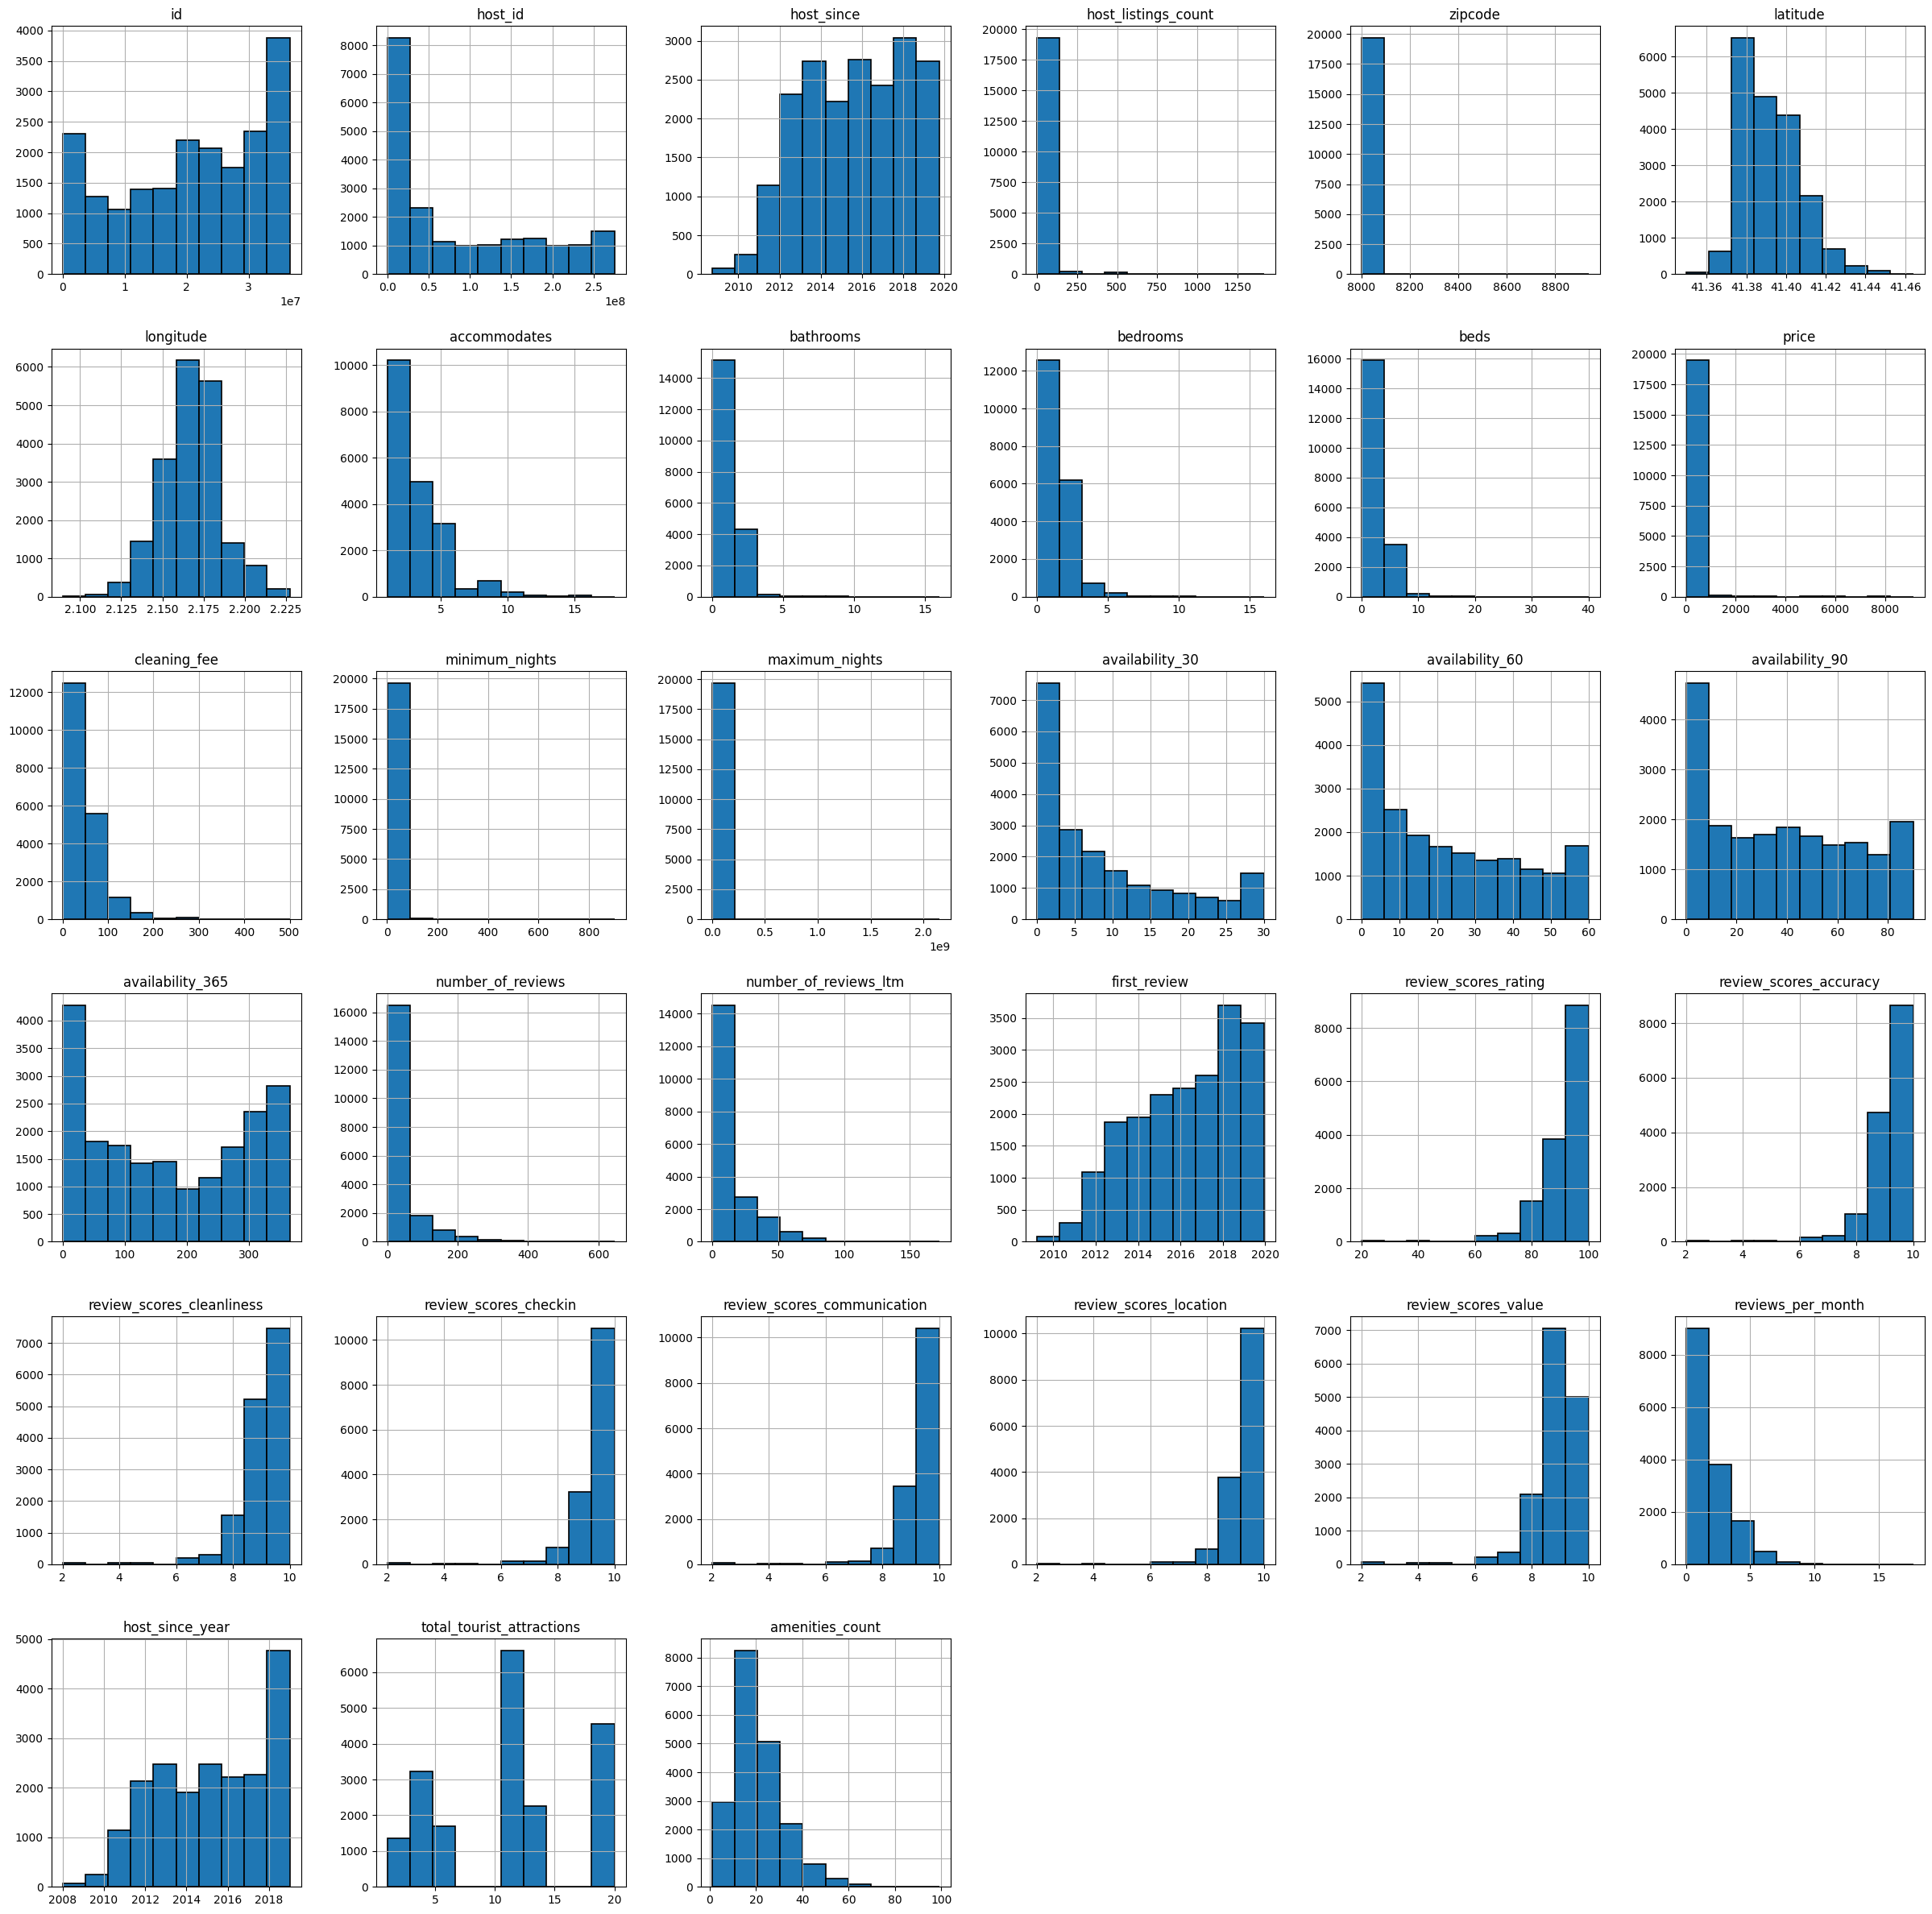

In [125]:
# Visualizing the distribution for every "feature"
df8.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

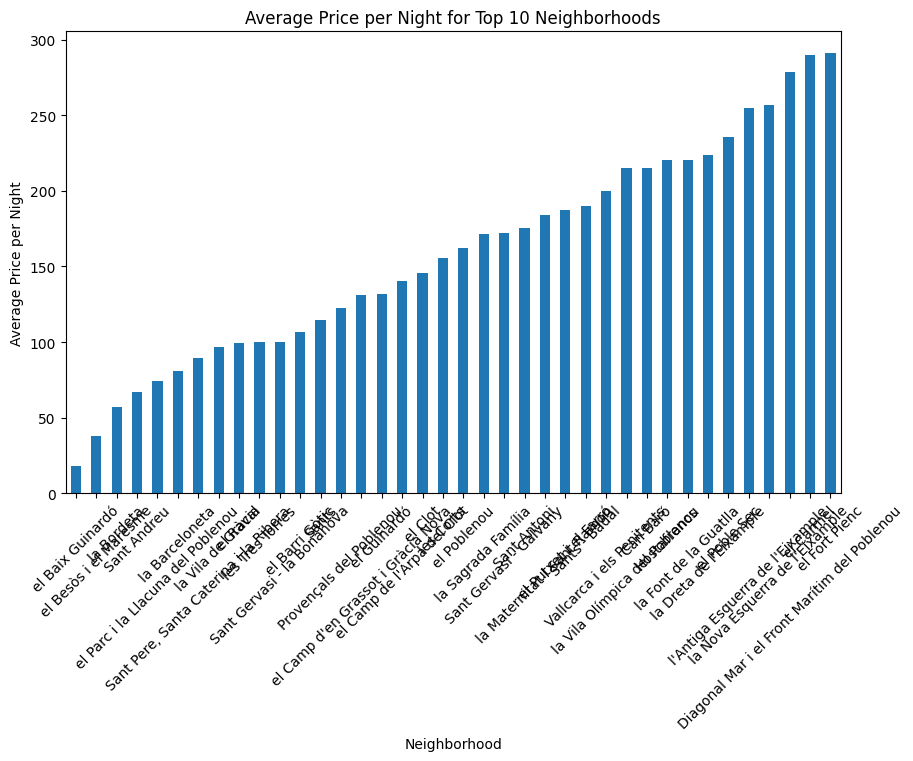

In [84]:
# top host cuantos listing

# Get the top 10 neighborhoods with the highest number of listings
top_10_host = df8['host_id'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top 10 neighborhoods
df_top_10 = df8[df8['host_id'].isin(top_10_host)]

# Calculate the average price per night for each neighborhood
average_price_per_night = df_top_10.groupby('neighbourhood_cleansed')['price'].mean().sort_values()

# Plot the average price per night for each neighborhood
average_price_per_night.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Neighborhood')
plt.ylabel('Average Price per Night')
plt.title('Average Price per Night for Top 10 Neighborhoods')
plt.xticks(rotation=45)
plt.show()


KeyError: 'neighbourhood_grouped_cleansed'

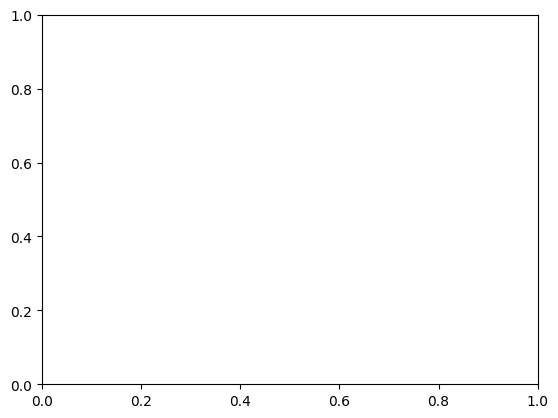

In [85]:

fig, ax = plt.subplots()
#y = grouped_location['VOLUSIA COUNTY']

selected_neigh = ['Eixample', 'Sant Martí', 'Sants-Montjuïc', 'Les Corts']

# Filter the DataFrame for selected counties
df_filtered = df8[df8['neighbourhood_grouped_cleansed'].isin(selected_neigh)]

# Pivot the data to get incidents per season for each county
pivot_df = df_filtered.pivot(index='neighbourhood_grouped_cleansed', columns='property_type', values='id')

# Fill NaN with 0 if necessary
pivot_df = pivot_df.fillna(0)

# Extract the data for plotting
counties = pivot_df.index.tolist()
fall = pivot_df['fall'].tolist()
spring = pivot_df['spring'].tolist()
summer = pivot_df['summer'].tolist()
winter = pivot_df.get('winter', [0]*len(counties)).tolist()  # If winter is not present, fill with zeros

# Number of counties
X_axis = np.arange(len(counties))

# Plotting
fig, ax = plt.subplots()

# Width of bars
bar_width = 0.2

# Creating bars
plt.bar(X_axis - bar_width * 1.5, fall, bar_width, label='fall')
plt.bar(X_axis - bar_width * 0.5, spring, bar_width, label='spring')
plt.bar(X_axis + bar_width * 0.5, summer, bar_width, label='summer')
plt.bar(X_axis + bar_width * 1.5, winter, bar_width, label='winter')

# Customizing the plot
plt.xticks(X_axis, counties)
plt.xlabel("County")
plt.ylabel("Total number of incidents")
plt.legend()
plt.title("Incidents per Season by County")
plt.show()

In [ ]:
pivot_room_type =df8.pivot_table(index="room_type", columns="neighbourhood_group_cleansed", values="price", aggfunc='mean')
styled_pivot_table = (pivot_room_type.style.format("{:.0f}"))
styled_pivot_table

In [ ]:
lil = df8['price'].isnull().sum()
print(f"Number of null values in 'zipcode' after filling nulls: {lil}")

pivot_list_df = df8.pivot_table(index='neighbourhood_group_cleansed', columns='host_since_year', values='listing_url', aggfunc='count')

# Apply the function and format the values as integers
styled_pivot_list = (pivot_list_df.style.format("{:.0f}"))  # This formats the numbers as integers

# Display the styled pivot table
styled_pivot_list


# Create the pivot table


In [ ]:
frequency = df8['host_since_year'].value_counts()
x = frequency.index.to_list()
y = list(frequency.values)
fig, ax = plt.subplots()
ax.set_ylabel('id')
ax.set_xlabel('host_since_year')
plt.bar(x,y)
plt.show()

In [ ]:
# check the number of listings per year

frequency = df8['host_since_year'].value_counts()
x = frequency.index.to_list()
y = list(frequency.values)
fig, ax = plt.subplots()
ax.set_ylabel('id')
ax.set_xlabel('host_since_year')
plt.bar(x,y)
plt.show()

In [ ]:
# Compute the frequency of 'host_since_year'
frequency = bcn_df['host_since_year'].value_counts().sort_index()

# Convert the result to lists for plotting
x = frequency.index.to_list()
y = list(frequency.values)

# Plot the frequency as a line plot
fig, ax = plt.subplots(figsize=(6, 2))
ax.plot(x, y, marker='o', linestyle='-', color='b')
ax.set_ylabel('Number of Hosts')
ax.set_xlabel('Host Since Year')
ax.set_title('Number of Hosts per Year')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
neighbourhood_groups = bcn_df['neighbourhood_group_cleansed'].unique()

for group in neighbourhood_groups:
    # Filter the DataFrame for the current group
    group_df = bcn_df[bcn_df['neighbourhood_group_cleansed'] == group]
    
    # Calculate the frequency of 'host_since_year' for the current group
    frequency = group_df['host_since_year'].value_counts().sort_index()
    x = frequency.index.to_list()
    y = list(frequency.values)
    
    # Plot the frequency of 'host_since_year' for the current group
    fig, ax = plt.subplots()
    ax.set_ylabel('Count')
    ax.set_xlabel('host_since_year')
    ax.set_title(f'Host Since Year for {group}')
    plt.bar(x, y)
    plt.show()

In [ ]:
# check the number of listings per year

#same tanh thew code below, but for each neighbourhood_group_cleansed show another horizontal bar in a different colour with the average of square_feet
                   
mean_prices = bcn_df.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values()

# Convert the result to lists for plotting
x = mean_prices.index.to_list()
y = mean_prices.values

# Plot the mean prices as horizontal bars
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_xlabel('Average Price')
ax.set_ylabel('Neighbourhood')
ax.set_title('Average Price per Neighbourhood')
plt.barh(x, y)
plt.show()

In [ ]:
# Calculate the mean price and mean square feet for each 'neighbourhood_group_cleansed'
mean_prices = bcn_df.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values()
mean_square_feet = bcn_df.groupby('neighbourhood_group_cleansed')['square_feet'].mean().sort_values()

# Ensure both series are aligned
mean_square_feet = mean_square_feet.reindex(mean_prices.index)

# Convert the result to lists for plotting
neighbourhoods = mean_prices.index.to_list()
avg_prices = mean_prices.values
avg_square_feet = mean_square_feet.values

# Plot the mean prices and mean square feet as horizontal bars
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
y_pos = range(len(neighbourhoods))

# Plot average prices
ax.barh(y_pos, avg_prices, bar_width, label='Average Price', color='skyblue', edgecolor='black')

# Plot average square feet
ax.barh([p + bar_width for p in y_pos], avg_square_feet, bar_width, label='Average Square Feet', color='lightcoral', edgecolor='black')

# Add labels and title
ax.set_xlabel('Values')
ax.set_ylabel('Neighbourhood Group Cleansed')
ax.set_title('Average Price and Average Square Feet per Neighbourhood Group Cleansed')
ax.set_yticks([p + bar_width / 1 for p in y_pos])
ax.set_yticklabels(neighbourhoods)

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
#fig, ax = plt.subplots((figsize=(10, 8)))
#y = grouped_location['VOLUSIA COUNTY']

#x = list(grouped_location['Year'].index.values)
#y = grouped_location['Year'].iloc[:, 0].value_counts().index.to_list()
X_axis = np.arange(len(x))

plt.bar(X_axis - 0.4, y1, 0.2, label = 'fall')
plt.bar(X_axis - 0.2, y2, 0.2, label = 'spring')
plt.bar(X_axis + 0.0, y3, 0.2, label = 'summer')
plt.bar(X_axis + 0.2, y4, 0.2, label = 'winter')

#ax.set_xticklabels(x,rotation=45)
plt.xticks(X_axis, x)
plt.xlabel("County")
plt.ylabel("Total number of incidents")

plt.legend()
plt.show()



fig, ax = plt.subplots(figsize=(14, 10))  # Adjust the size as needed

# Create horizontal bar plot
ax.barh(x, y, color='skyblue', edgecolor='black')

# Add labels and title
ax.set_xlabel('Average Price ($)')
ax.set_ylabel('Neighbourhood')
ax.set_title('Average Price per Neighbourhood in Barcelona')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels to each bar
for i in range(len(y)):
    ax.text(y[i], i, f'${y[i]:.2f}', va='center', ha='left', fontsize=10)

# Show the plot
plt.show()

In [ ]:
# Handle null values by filling with the mean value of the corresponding 'neighbourhood_cleansed'
bcn_df['bathrooms'] = bcn_df.groupby('neighbourhood_cleansed')['bathrooms'].transform(lambda x: x.fillna(x.mean()))
bcn_df['bedrooms'] = bcn_df.groupby('neighbourhood_cleansed')['bedrooms'].transform(lambda x: x.fillna(x.mean()))
bcn_df['beds'] = bcn_df.groupby('neighbourhood_cleansed')['beds'].transform(lambda x: x.fillna(x.mean()))

# Convert columns to integer data type
bcn_df['bathrooms'] = bcn_df['bathrooms'].astype(int)
bcn_df['bedrooms'] = bcn_df['bedrooms'].astype(int)
bcn_df['beds'] = bcn_df['beds'].astype(int)

# Check the data types after conversion
#print(bcn_df.dtypes)
# Check for null values in 'zipcode' after filling
null_zipcode_count_after = bcn_df['bathrooms'].isnull().sum()
null_zipcode_count_after2 = bcn_df['bedrooms'].isnull().sum()
null_zipcode_count_after3 = bcn_df['beds'].isnull().sum()
print(f"Number of null values in 'zipcode' after filling nulls: {null_zipcode_count_after}")
print(f"Number of null values in 'zipcode' after filling nulls: {null_zipcode_count_after2}")
print(f"Number of null values in 'zipcode' after filling nulls: {null_zipcode_count_after3}")

In [ ]:
#we have the column bes and the column beedroom , i ned to add a new column that calculates the ratio of beds per bedroom, and that info goes in a nwe column called beds_ratio
#we have the column bes and the column beedroom , i ned to add a new column that calculates the ratio of beds per bedroom, and that info goes in a nwe column called beds_ratio


# Calculate the ratio of beds per bedroom and store it in a new column
bcn_df['beds_ratio'] = bcn_df['beds'] / bcn_df['bedrooms']

# Show the updated DataFrame
#print(bcn_df.head())
#print(bcn_df['beds_ratio'].unique())

bcn_df['beds_ratio'] = (bcn_df['beds'] / bcn_df['bedrooms']).round(2)

# Replace 'inf' values with NaN
bcn_df['beds_ratio'] = bcn_df['beds_ratio'].replace(np.inf, np.nan).round(2)

# Fill NaN values in 'beds_ratio' column with the mean value of the corresponding 'neighbourhood_cleansed'
bcn_df['beds_ratio'] = bcn_df.groupby('neighbourhood_cleansed')['beds_ratio'].transform(lambda x: x.fillna(x.mean().round(2)))

# Show unique values in the 'beds_ratio' column
print(bcn_df['beds_ratio'].unique())

#after calculating the ratio it mus be in all cases an intiger (2 decimlas). Then for null values, fill the null value looking at the average value in the column neighbourhood_cleansed, so for each neighbourhood_cleansed with a null give the average for the same neighbourhood_cleansed  